In [3]:
import wandb
import pandas as pd
import json
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# wandb.init(project="lab-1")
# RUN code
# wandb.finish()

In [4]:
df = pd.read_csv("practica_micro.csv")
df['MALDI_binned'] = df['MALDI_binned'].apply(json.loads)
df = pd.concat([pd.DataFrame(df["MALDI_binned"].to_dict()).T, df], axis=1)
df.drop("MALDI_binned", inplace=True, axis=1)
df.columns = [f"MALDI_{i}" for i in range(6000)] + ["Erythromycin", "Ciprofloxacin"]
df.head()

,MALDI_0,MALDI_1,MALDI_2,MALDI_3,MALDI_4,MALDI_5,MALDI_6,MALDI_7,MALDI_8,MALDI_9,...,MALDI_5992,MALDI_5993,MALDI_5994,MALDI_5995,MALDI_5996,MALDI_5997,MALDI_5998,MALDI_5999,Erythromycin,Ciprofloxacin
0,0.000254,0.000395,0.000453,0.000495,0.000801,0.000879,0.001296,0.000631,0.000040,0.000295,...,0.000023,0.000062,0.000061,0.000056,0.000071,0.000052,0.000044,0.000025,0.0,0.0
1,0.000339,0.000203,0.000097,0.000844,0.000769,0.000667,0.000974,0.000557,0.000116,0.000038,...,0.000056,0.000074,0.000096,0.000154,0.000075,0.000067,0.000042,0.000022,0.0,0.0
2,0.000123,0.000162,0.000089,0.000671,0.000563,0.001250,0.001091,0.000240,0.000078,0.000060,...,0.000029,0.000055,0.000112,0.000084,0.000072,0.000060,0.000046,0.000003,1.0,0.0
3,0.000282,0.000608,0.000158,0.000486,0.000495,0.000468,0.000414,0.000147,0.000160,0.000277,...,0.000037,0.000015,0.000003,0.000004,0.000021,0.000036,0.000045,0.000096,0.0,1.0
4,0.000370,0.000243,0.000149,0.000620,0.000307,0.000999,0.000981,0.000304,0.000262,0.000104,...,0.000050,0.000037,0.000025,0.000051,0.000056,0.000078,0.000099,0.000140,0.0,0.0


In [5]:
df.Ciprofloxacin.value_counts()

Ciprofloxacin
0.0    1614
1.0     117
Name: count, dtype: int64

In [6]:
df.Erythromycin.value_counts()

Erythromycin
0.0    1387
1.0     344
Name: count, dtype: int64

In [7]:
df.describe()

,MALDI_0,MALDI_1,MALDI_2,MALDI_3,MALDI_4,MALDI_5,MALDI_6,MALDI_7,MALDI_8,MALDI_9,...,MALDI_5992,MALDI_5993,MALDI_5994,MALDI_5995,MALDI_5996,MALDI_5997,MALDI_5998,MALDI_5999,Erythromycin,Ciprofloxacin
count,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1.731000e+03,1731.000000,1731.000000,...,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000
mean,0.000169,0.000267,0.000233,0.000428,0.000559,0.001143,0.001044,3.271136e-04,0.000194,0.000250,...,0.000045,0.000047,0.000046,0.000046,0.000045,0.000046,0.000046,0.000046,0.198729,0.067591
std,0.000247,0.000270,0.000219,0.000326,0.000387,0.000852,0.000835,2.753587e-04,0.000202,0.000245,...,0.000032,0.000032,0.000033,0.000033,0.000030,0.000032,0.000032,0.000031,0.399159,0.251115
min,0.000000,0.000000,0.000000,0.000000,0.000012,0.000016,0.000011,5.100046e-07,0.000005,0.000004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000001,0.000051,0.000072,0.000179,0.000280,0.000559,0.000433,1.269581e-04,0.000064,0.000103,...,0.000022,0.000022,0.000021,0.000021,0.000022,0.000022,0.000022,0.000022,0.000000,0.000000
50%,0.000050,0.000189,0.000165,0.000361,0.000490,0.000939,0.000841,2.650299e-04,0.000130,0.000185,...,0.000041,0.000043,0.000041,0.000040,0.000039,0.000040,0.000040,0.000040,0.000000,0.000000
75%,0.000260,0.000405,0.000334,0.000609,0.000739,0.001485,0.001429,4.393161e-04,0.000260,0.000329,...,0.000062,0.000064,0.000066,0.000064,0.000061,0.000064,0.000065,0.000063,0.000000,0.000000
max,0.001834,0.002093,0.001563,0.002169,0.003013,0.006131,0.007173,2.199543e-03,0.003024,0.003437,...,0.000225,0.000207,0.000237,0.000272,0.000191,0.000205,0.000178,0.000190,1.000000,1.000000


In [8]:
y_E= df["Erythromycin"]
y_C= df["Ciprofloxacin"]

X = df.drop(["Erythromycin","Ciprofloxacin"], axis=1)

In [9]:
X_train, X_test, y_train_E, y_test_E = train_test_split(X, y_E, random_state=42, test_size=0.3)

In [10]:
y_test_E.value_counts(normalize=True)

Erythromycin
0.0    0.817308
1.0    0.182692
Name: proportion, dtype: float64

In [11]:
clf = LogisticRegression().fit(X_train, y_train_E)

In [12]:
clf.score(X_test, y_test_E)

0.8173076923076923

AUC: 0.5717151702786377


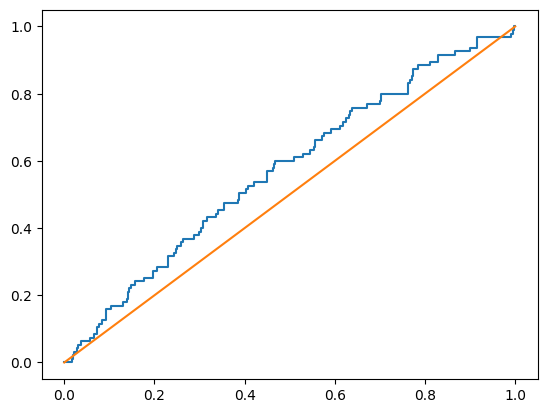

In [13]:
y_proba_E = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test_E, y_proba_E)
fpr, tpr, thresholds = roc_curve(y_test_E, y_proba_E)
print(f"AUC: {auc}")

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.show()
